## Twitter Sentiment Analytics for 5/10 - 6/1

In [34]:
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dateutil.parser as parser
%matplotlib inline

In [35]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [37]:
df = pd.read_csv('data/5_10-6_1-sentiment.csv', quoting=csv.QUOTE_NONE, encoding='utf-8')

In [40]:
df.head(1)

,id,date,text,retweet_count,favorite_count,coordinates_lat,coordinates_long,user_screen_name,user_created_at,user_location,user_description,user_followers_count,user_friends_count,user_listed_count,user_favorites_count,user_statuses_count,sentiment
0,737210383463763968,Mon May 30 02:13:46 PDT 2016,Bernie Sanders gets a lesson on California far...,0,0,NaN,NaN,CarponCoby,Wed Apr 29 13:13:10 PDT 2015,Long Island New York,My ego won't let me bio and it's my own fault.,40,205,1,65,249,0.0


In [41]:
len(df)

740549

### Users with Location

#### Specify Location

In [303]:
location = df[(df['user_location'].notnull())]

In [304]:
len(location)

508963

## Function

In [533]:
real_data = {}    # [clinton, sanders]
# favors clinton
real_data['FL'] = [64.4, 33.3]
real_data['PA'] = [55.6, 43.6]
real_data['NY'] = [58.0, 42.0]
real_data['TX'] = [65.2, 33.2]
real_data['MD'] = [63.0, 33.2]
real_data['VA'] = [64.3, 35.2]

# favors sanders 
real_data['CO'] = [40.3, 59.0]
real_data['MN'] = [38.4, 61.6]
real_data['KS'] = [32.3, 67.7]
real_data['UT'] = [20.3, 79.3]
real_data['WA'] = [27.1, 72.7]

# close call
real_data['KY'] = [46.8, 46.3]

In [534]:
def analysis(regex):
    dfs = location[location['user_location'].str.contains(regex, na=False)]
    print 'People who talked about state ' + regex + ': ' + str(len(dfs))
    
    show_candidate(dfs, 'Sanders', 1)
    show_candidate(dfs, 'Clinton', 2)
    show_candidate(dfs, 'Trump', 3)
    
    plt.tight_layout()
    plt.show()
    
    show_democrat(dfs,regex)


In [535]:
def show_candidate(dfs, candidate, i):
    
    
    # define data for sanders
    candidate_str = '(?i)' + candidate
    dfc = dfs[dfs['text'].str.contains(candidate_str, na=False)]
    pos = len(dfc[dfc['sentiment'] > 0])
    neg = len(dfc[dfc['sentiment'] < 0])
    
    pos_r = round(100.0 * pos / len(dfc), 2)
    neg_r = round(100.0 * neg / len(dfc), 2)
    
    sizes = [pos_r, neg_r]

    #define colors
    colors = ['lightcoral', 'lightskyblue']
    labels = ['pos: ' + str(pos_r), 'neg: ' + str(neg_r)]
    
    # draw figure for candidate
    ax = plt.subplot(1, 3, i)
    patches, texts = ax.pie(sizes, labels=labels, colors=colors, shadow=True)
    ax.legend(patches, labels, loc="best", title=candidate)
    
    ax.axis('equal')
    
    print candidate + ' - Total: ' + str(len(dfc)) + '\nPos: ' + str(pos) + ', Neg: ' + str(neg)
    print ''
    
    

In [536]:
def show_democrat(dfs, regex):
    
    # get data for sanders
    df_sanders = dfs[dfs['text'].str.contains('(?i)Sanders', na=False)]
    sanders_pos = len(df_sanders[df_sanders['sentiment'] > 0])
    sanders_tot = len(df_sanders)
    sanders_ratio = sanders_pos * 100.0 / sanders_tot
    
    # get data for clinton
    df_clinton = dfs[dfs['text'].str.contains('(?i)Clinton', na=False)]
    clinton_pos = len(df_clinton[df_clinton['sentiment'] > 0])
    clinton_tot = len(df_clinton)
    clinton_ratio = clinton_pos * 100.0 / clinton_tot
        
#     print 'Sentiment - Clinton: ' + str(round(clinton_ratio,1)) +  ', Sanders: ' + str(round(sanders_ratio,1))
        
    # for drawing
    colors = ['lightskyblue', 'yellowgreen']
    labels = ['Clinton', 'Sanders']
#     sizes = [clinton_pos, sanders_pos]
    sizes = [clinton_ratio, sanders_ratio]

    ax1 = plt.subplot(1,2,1)
    patches, texts, autotext = ax1.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
    ax1.legend(patches, labels, loc="best", title="Sentiment Analysis")
    ax1.axis('equal')
    
    ax2 = plt.subplot(1,2,2)
    state_key = getStateAcronym(regex)
    
    if state_key in real_data:
        data = real_data[state_key]
        patches, texts, autotext = ax2.pie(data, labels=labels, 
                                       colors=colors, shadow=True, autopct='%1.1f%%')
        ax2.legend(patches, labels, loc="best", title="Real Data")
        ax2.axis('equal')
#         print 'RealData - Clinton: ' + str(data[0]) +  ', Sanders: ' + str(data[1])
    
    
    
    plt.tight_layout()
    plt.show()
    

In [537]:
def getStateAcronym(regex):
    return regex.split('|')[0]

### Huge Favor of Clinton

## Virginia

People who talked about state VA|Virginia: 5234
Sanders - Total: 957
Pos: 284, Neg: 140

Clinton - Total: 447
Pos: 155, Neg: 76

Trump - Total: 2542
Pos: 788, Neg: 499



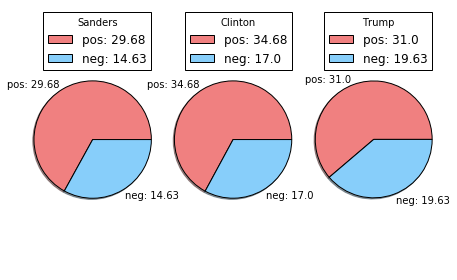

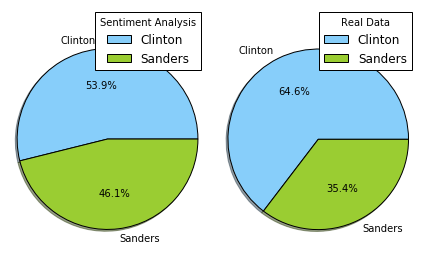

In [538]:
virginia = 'VA|Virginia'
analysis(virginia)

## Maryland

People who talked about state MD|Maryland: 3277
Sanders - Total: 625
Pos: 219, Neg: 110

Clinton - Total: 292
Pos: 108, Neg: 49

Trump - Total: 1561
Pos: 489, Neg: 321



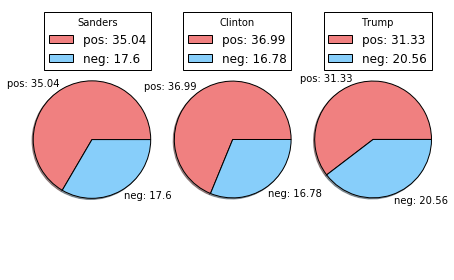

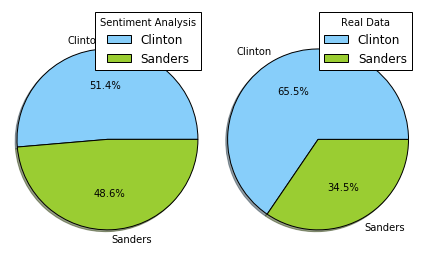

In [524]:
maryland = 'MD|Maryland'
analysis(maryland)

## New York

People who talked about state NY|New York|N.Y: 38307
Sanders - Total: 7578
Pos: 2555, Neg: 1347

Clinton - Total: 3444
Pos: 1188, Neg: 625

Trump - Total: 22322
Pos: 6574, Neg: 3615



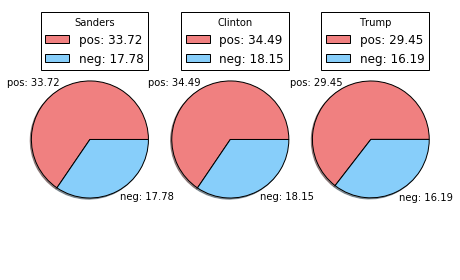

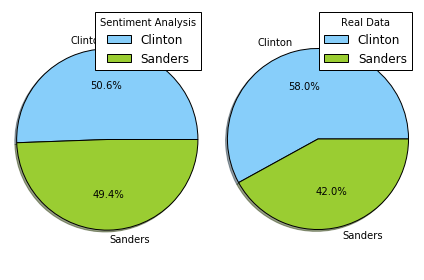

In [525]:
NY_str = 'NY|New York|N.Y'
analysis(NY_str)

## Texas

People who talked about state TX|Texas: 16653
Sanders - Total: 2569
Pos: 929, Neg: 418

Clinton - Total: 1282
Pos: 390, Neg: 251

Trump - Total: 9053
Pos: 2588, Neg: 1632



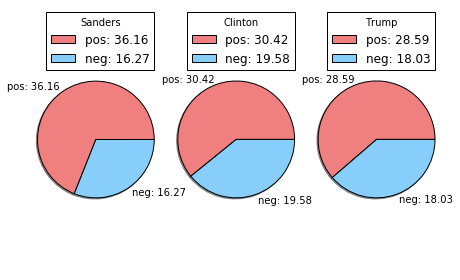

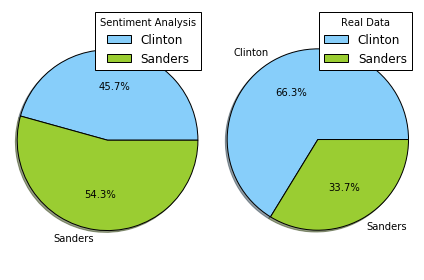

In [539]:
texas = 'TX|Texas'
analysis(texas)


## Florida

People who talked about state FL|Florida: 16422
Sanders - Total: 2830
Pos: 949, Neg: 463

Clinton - Total: 1353
Pos: 440, Neg: 256

Trump - Total: 8783
Pos: 2858, Neg: 1562



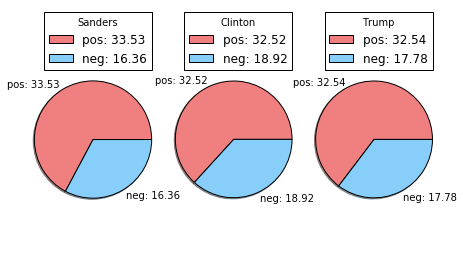

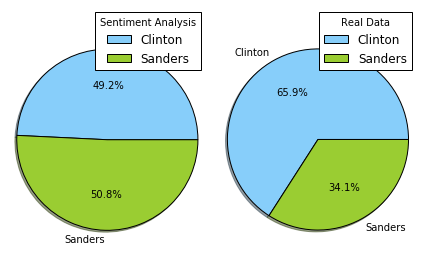

In [540]:
FL_str = 'FL|Florida'
analysis(FL_str)

### Huge Favor of Sanders

## Minnesota

People who talked about state MN|Minnesota: 2667
Sanders - Total: 628
Pos: 223, Neg: 71

Clinton - Total: 254
Pos: 74, Neg: 31

Trump - Total: 1177
Pos: 364, Neg: 204



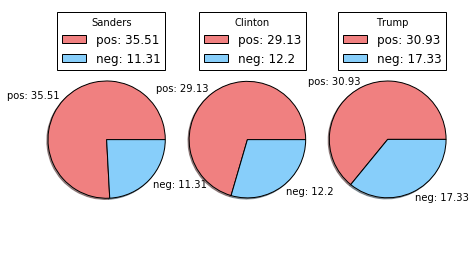

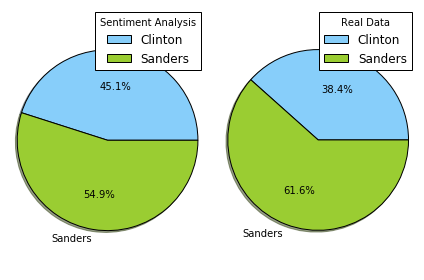

In [526]:
minnesota = 'MN|Minnesota'
analysis(minnesota)

## Utah

People who talked about state UT|Utah: 1326
Sanders - Total: 245
Pos: 104, Neg: 26

Clinton - Total: 97
Pos: 29, Neg: 18

Trump - Total: 711
Pos: 255, Neg: 128



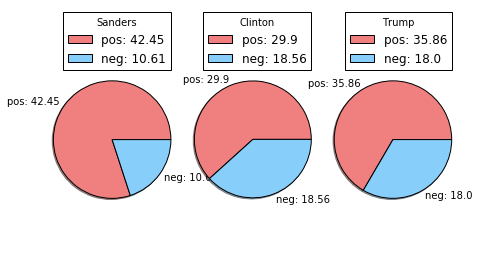

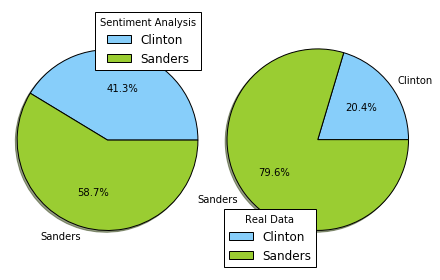

In [528]:
utah = 'UT|Utah'
analysis(utah)

## Washington

People who talked about state WA|Washington: 28569
Sanders - Total: 4673
Pos: 1555, Neg: 683

Clinton - Total: 2661
Pos: 852, Neg: 407

Trump - Total: 17116
Pos: 4716, Neg: 2417



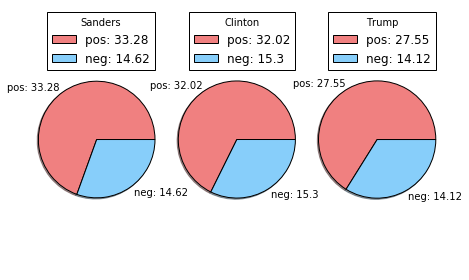

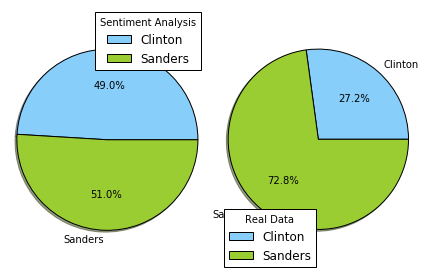

In [529]:
wash = 'WA|Washington'
analysis(wash)

## Colorado

People who talked about state CO|Colorado: 4366
Sanders - Total: 1009
Pos: 352, Neg: 141

Clinton - Total: 432
Pos: 138, Neg: 62

Trump - Total: 1950
Pos: 616, Neg: 374



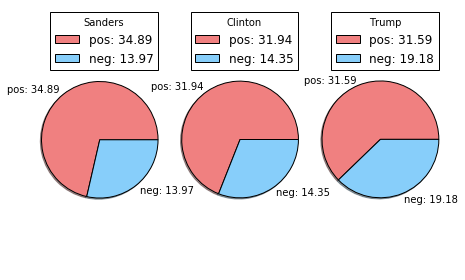

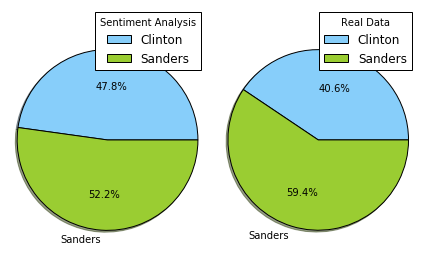

In [530]:
colorado = 'CO|Colorado'
analysis(colorado)

## Kansas

People who talked about state KS|Kansas: 1968
Sanders - Total: 455
Pos: 145, Neg: 55

Clinton - Total: 149
Pos: 54, Neg: 27

Trump - Total: 984
Pos: 318, Neg: 170



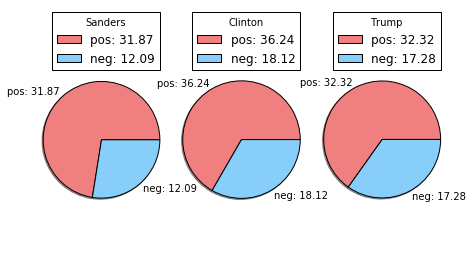

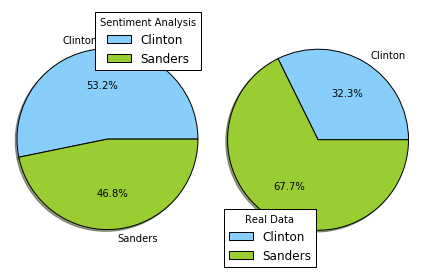

In [541]:
kansas = 'KS|Kansas'
analysis(kansas)

### Not so Obvious

## Pennsylvania

People who talked about state PA|Pennsylvania: 6779
Sanders - Total: 1564
Pos: 592, Neg: 210

Clinton - Total: 587
Pos: 185, Neg: 95

Trump - Total: 3446
Pos: 1140, Neg: 629



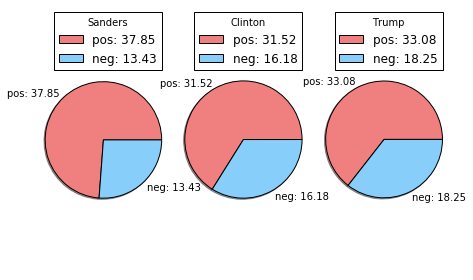

Support Ratio
Sanders: 37.8516624041, Clinton: 31.5161839864


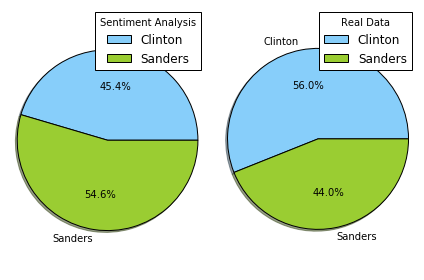

In [487]:
penn = 'PA|Pennsylvania'
analysis(penn)

### Undecided

## Kentucky

People who talked about state KY|Kentucky: 1731
Sanders - Total: 347
Pos: 128, Neg: 56

Clinton - Total: 149
Pos: 45, Neg: 34

Trump - Total: 789
Pos: 248, Neg: 144



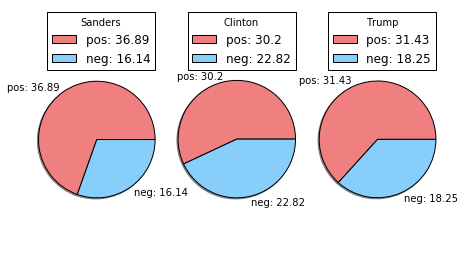

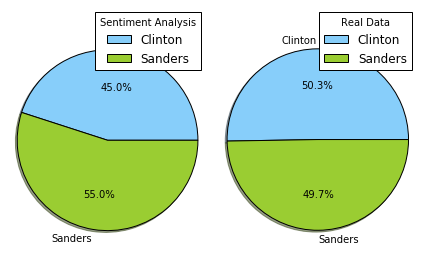

In [543]:
kentucky = 'KY|Kentucky'
analysis(kentucky)

### Hasn't Occured Yet

## California

People who talked about state CA|California: 34052
Sanders - Total: 9631
Pos: 3137, Neg: 1382

Clinton - Total: 2796
Pos: 919, Neg: 493

Trump - Total: 15763
Pos: 5060, Neg: 3015



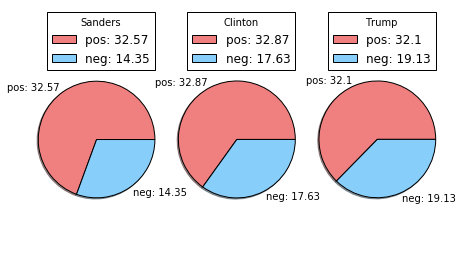

Support Ratio
Sanders: 32.5719032292, Clinton: 32.8683834049


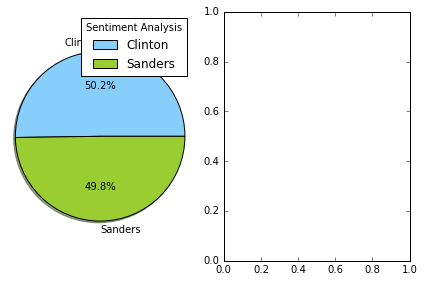

In [484]:
CA_str ='CA|California'
analysis(CA_str)